# Image Understanding and Compression with PCA

This notebook covers two main areas:
- **Image Processing**: Using Python libraries (Pillow, NumPy, and Matplotlib) to read, display, manipulate, and transform images.
- **Image Compression with PCA**: Building a Principal Component Analysis (PCA) from scratch to compress and reconstruct images.

The following exercises are designed to guide you through these topics.


## Exercise 1: Basic Image Processing with Python

### Task 1: Read and Display the Image
- **Objective**: Read an image using the Pillow library and display it.
- **Tips**:
  - Use `Image.open()` from Pillow.
  - Use Matplotlib’s `imshow()` to display the image.


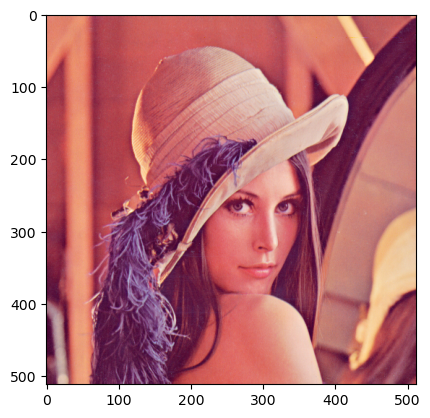

In [ ]:
# Read and Display the image using the Pillow library
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file
img = Image.open('Lenna.png')

# Display the image
plt.imshow(img)
plt.show()

### Task 2: Extract and Display the Top-Left Corner (100×100 pixels)
- **Objective**: Extract the top-left region (100×100 pixels) of the image.
- **Tips**:
  - Convert the image to a NumPy array.
  - Use array slicing (e.g., `img_array[:100, :100]`) to extract the region.
  - Display the extracted region using Matplotlib.

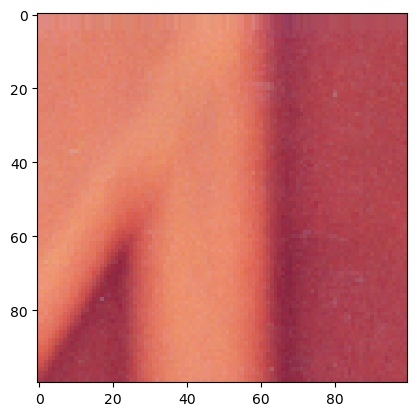

In [ ]:
import numpy as np

# Convert the image to a NumPy array
img_array = np.array(img)

# Extract the top-left corner (100x100 pixels)
top_left_corner = img_array[:100, :100]

# Display the extracted region
plt.imshow(top_left_corner)
plt.show()

### Task 3: Separate and Display the Three Color Channels (R, G, B)
- **Objective**: Isolate the Red, Green, and Blue channels from the image.
- **Tips**:
  - Use NumPy indexing to extract each channel.
  - Display each channel individually.
  - Note: When using Matplotlib with colormaps (e.g., `cmap='Reds'`), you might see a colored background. Using Pillow to display may show a grayscale version of each channel.


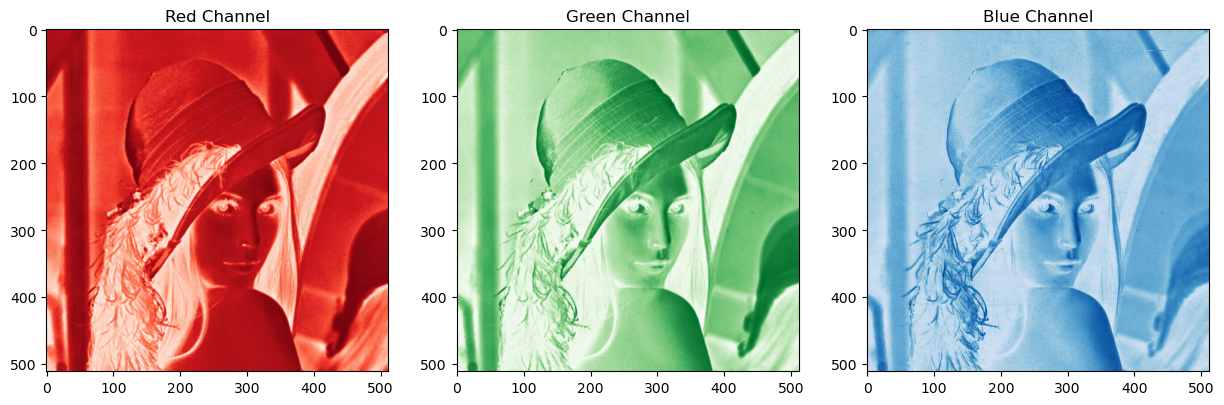

In [ ]:
# Extract the Red, Green, and Blue channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# Display the Red channel
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')

# Display the Green channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')

# Display the Blue channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')

plt.show()

### Task 4: Modify the Top 100×100 Pixels to a Value of 210
- **Objective**: Change the pixel values in the top-left 100×100 region to 210 (a light gray).
- **Tips**:
  - Modify the NumPy array directly for that region.
  - Display the modified image to observe the change.

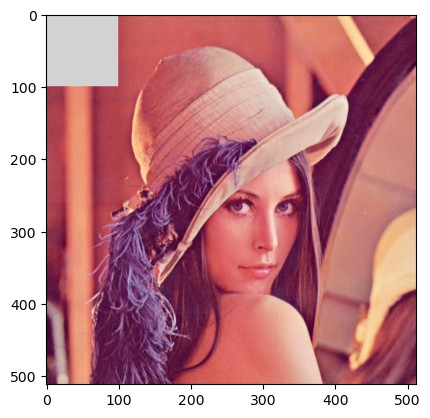

In [ ]:
# Modify the top-left 100x100 pixels to a value of 210
img_array[:100, :100] = 210

# Display the modified image
plt.imshow(img_array)
plt.show()

## Exercise 2: Grayscale Image Processing

### Task 1: Load and Display a Grayscale Image
- **Objective**: Load a grayscale image using Pillow and display it.
- **Tips**:
  - Use `Image.open()` and convert the image mode to 'L' (grayscale) if necessary.
  - Display using Matplotlib.

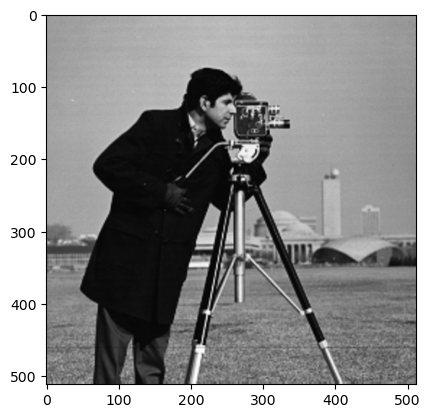

In [ ]:
# Load the image and convert it to grayscale
gray_img = Image.open('cameraman.png')
# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.show()

### Task 2: Extract and Display the Middle Section (150 pixels)
- **Objective**: Extract a central 150-pixel section of the image.
- **Tips**:
  - Determine the center of the image.
  - Use NumPy slicing to crop a 150-pixel section centered in the image.
  - Display the cropped section using Matplotlib.

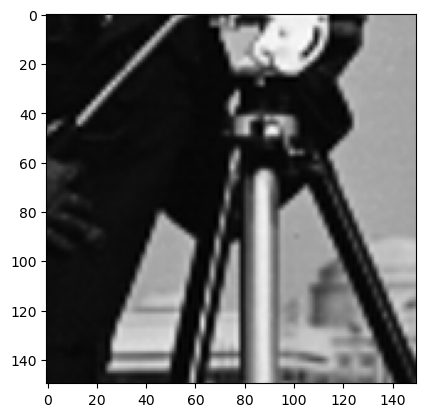

In [ ]:
# Determine the center of the image
center_x, center_y = gray_img.size[0] // 2, gray_img.size[1] // 2

# Calculate the coordinates for the central 150-pixel section
half_size = 75
left = center_x - half_size
right = center_x + half_size
top = center_y - half_size
bottom = center_y + half_size

# Convert the grayscale image to a NumPy array
gray_img_array = np.array(gray_img)

# Extract the central 150-pixel section
central_section = gray_img_array[top:bottom, left:right]

# Display the cropped section
plt.imshow(central_section, cmap='gray')
plt.show()

### Task 3: Apply a Simple Threshold to the Image
- **Objective**: Create a binary image by applying a threshold.
- **Instructions**:
  - Set all pixel values below 100 to 0.
  - Set all pixel values equal to or above 100 to 255.
  - Display the thresholded (binary) image.

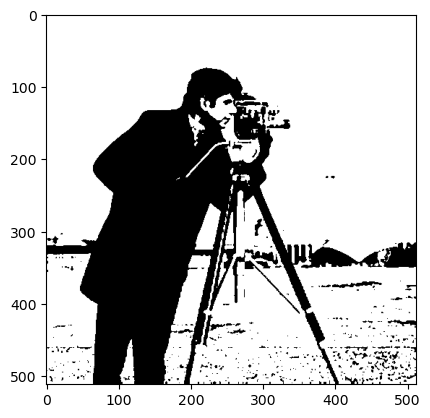

In [ ]:
# Apply a simple threshold to the grayscale image
threshold_value = 100
binary_img_array = np.where(gray_img_array < threshold_value, 0, 255)

# Display the thresholded (binary) image
plt.imshow(binary_img_array, cmap='gray')
plt.show()

### Task 4: Rotate the Image 90 Degrees Clockwise
- **Objective**: Rotate the image by 90° clockwise.
- **Tips**:
  - Use Pillow’s `rotate()` method or manipulate the NumPy array directly.
  - Display the rotated image.

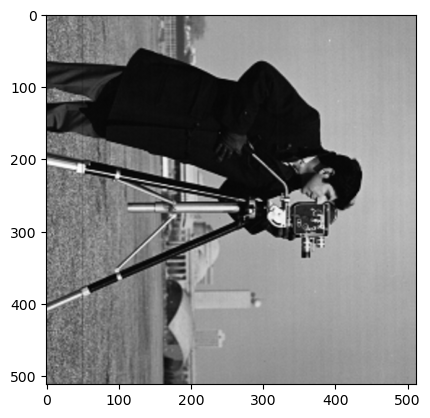

In [ ]:
# Rotate the image by 90 degrees clockwise
rotated_img = gray_img.rotate(-90, expand=True)

# Display the rotated image
plt.imshow(rotated_img, cmap='gray')
plt.show()

### Task 5: Convert the Grayscale Image to an RGB Image
- **Objective**: Convert the grayscale image to RGB.
- **Instructions**:
  - Replicate the grayscale values across the R, G, and B channels.
  - Display the resulting RGB image using Matplotlib.

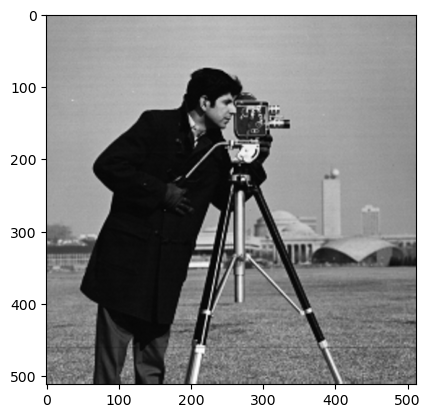

In [ ]:
# Convert the grayscale image to an RGB image by replicating the grayscale values across R, G, and B channels
rgb_img_array = np.stack((gray_img,)*3, axis=-1)

# Display the resulting RGB image
plt.imshow(rgb_img_array)
plt.show()

## Exercise 3: Image Compression and Decompression using PCA

### Overview
In this exercise, you will build a PCA from scratch to perform image compression. You will use an image of your choice (convert to grayscale if needed) and follow these steps:

### Step 1: Load and Prepare the Data
- **Fetch an Image**: Choose an image and, if necessary, convert it to grayscale.
- **Standardize the Data**: Center the data by subtracting the mean from the image pixels.
- **Compute the Covariance Matrix**: Use the standardized data to compute the covariance matrix.


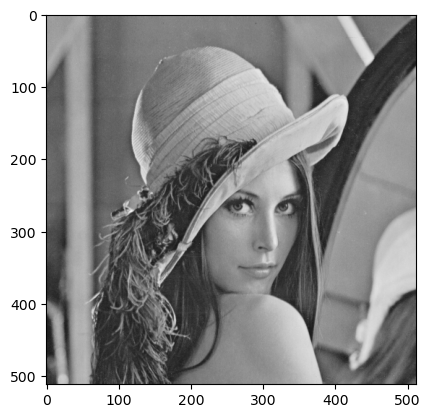

Mean Pixel Value: 95.72039031982422
Covariance Matrix:
 [[3209.09099422 3210.23773468  364.23316337 ...  157.10512476
   283.68592145  377.77078874]
 [3210.23773468 3211.50947514  365.53095569 ...  156.58408757
   283.23591533  379.06430024]
 [ 364.23316337  365.53095569 3622.23388194 ...  158.40135763
   226.61166448  140.24074654]
 ...
 [ 157.10512476  156.58408757  158.40135763 ... 3967.52544031
   937.9820817   979.9700954 ]
 [ 283.68592145  283.23591533  226.61166448 ...  937.9820817
  3999.48626697  843.69937546]
 [ 377.77078874  379.06430024  140.24074654 ...  979.9700954
   843.69937546 4098.69324471]]


In [ ]:
# Load the image
gray_img = Image.open('lena_gray.gif')

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.show()

# Convert the grayscale image to a NumPy array if not already done
gray_img_array = np.array(gray_img)

# Standardize the data by subtracting the mean
mean_pixel_value = np.mean(gray_img_array)
standardized_data = gray_img_array - mean_pixel_value

# Compute the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

print("Mean Pixel Value:", mean_pixel_value)
print("Covariance Matrix:\n", cov_matrix)

### Step 2: Eigen Decomposition and Principal Component Selection
- **Compute Eigenvalues and Eigenvectors**: Perform eigen decomposition on the covariance matrix.
- **Sort and Select Components**:
  - Sort the eigenvalues in descending order.
  - Choose the top *k* eigenvectors corresponding to the highest eigenvalues.
- **Cumulative Sum Plot**: Create a plot of the cumulative explained variance to help determine the optimal number of principal components.


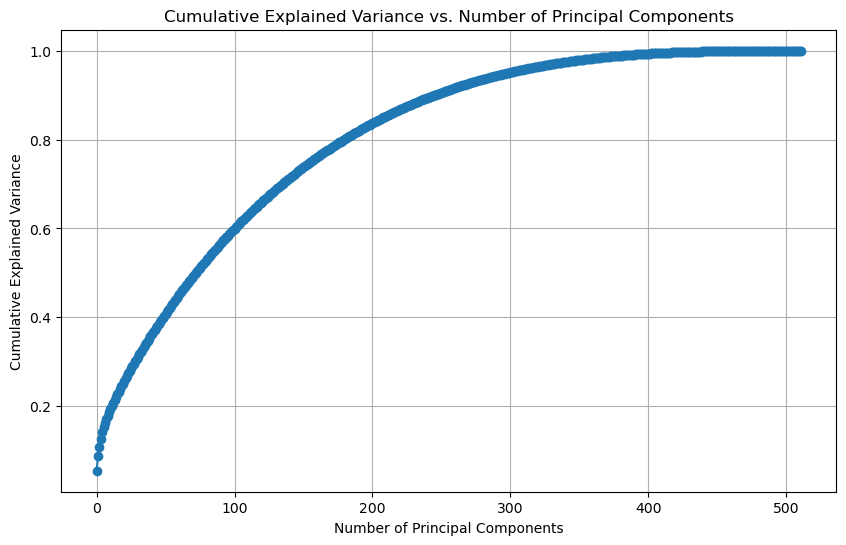

In [ ]:
# Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues in descending order and get the sorted indices
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

### Step 3: Reconstruction and Experimentation
- **Reconstruct the Image**:
  - Project the original data onto the selected principal components to obtain a lower-dimensional representation.
  - Reconstruct the image from this representation.
- **Experiment with Different Components**:
  - Try out at least four different combinations of principal components (varying explained variance).
  - Compare and display the reconstructed images.
- **Evaluation**: Assess the quality of the reconstructions based on the level of detail preserved.


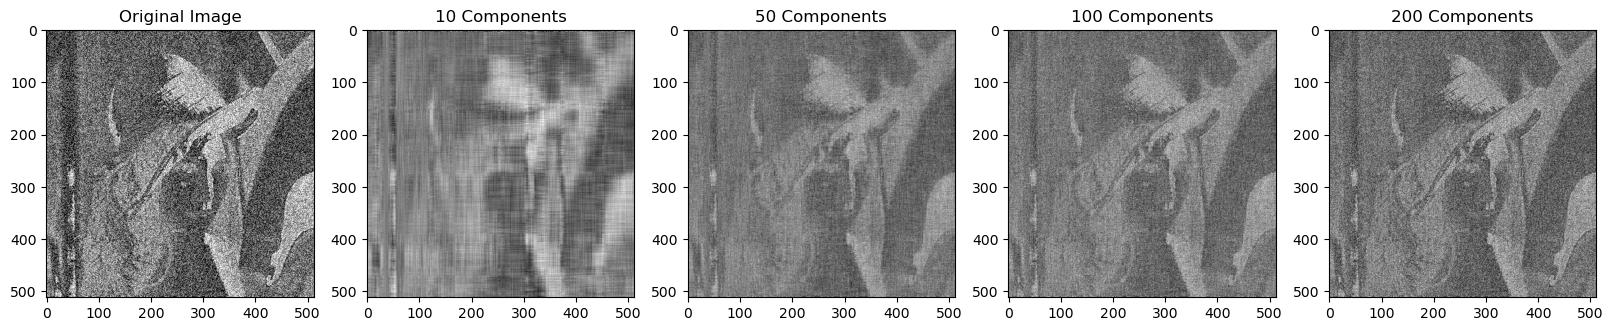

In [ ]:
# Function to reconstruct the image using a given number of principal components
def reconstruct_image(num_components):
    # Select the top 'num_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Project the standardized data onto the selected principal components
    lower_dimensional_representation = np.dot(standardized_data, selected_eigenvectors)

    # Reconstruct the image from the lower-dimensional representation
    reconstructed_data = np.dot(lower_dimensional_representation, selected_eigenvectors.T)

    # Add the mean pixel value to the reconstructed data to get the final image
    reconstructed_image = reconstructed_data + mean_pixel_value

    return reconstructed_image

# List of different numbers of principal components to experiment with
num_components_list = [10, 50, 100, 200]

# Plot the original and reconstructed images
plt.figure(figsize=(20, 10))

# Display the original image
plt.subplot(1, len(num_components_list) + 1, 1)
plt.imshow(gray_img_array, cmap='gray')
plt.title('Original Image')

# Display the reconstructed images
for i, num_components in enumerate(num_components_list):
    reconstructed_image = reconstruct_image(num_components)
    plt.subplot(1, len(num_components_list) + 1, i + 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'{num_components} Components')

plt.show()